# Minju Yu

## Research question/interests

My research question asks: Is there a relationship between personality traits and race?

Previous research shows the relationship between personality traits among various cultures and ethnicity. Cultures and ethnicity influence socialization patterns, which shape some of the variances of personality (Triandis & Suh, 2002). However, limited research investigates the relationship between personality traits and race. Therefore, I would like to investigate the relationship between personality traits and race. I hypothesize that a particular race group would show higher scores on the big five personality traits (extraversion, neuroticism, agreeableness, conscientiousness, openness) than other race groups.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_raw = pd.read_csv("../data/raw/data.csv", sep='\t')
df_raw

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,SG,1,4,3,...,1,3,5,3,4,1,4,2,5,3
19715,3,37,1,2,1,2,US,2,3,2,...,1,2,3,2,3,3,4,2,3,3
19716,5,16,2,1,1,2,US,2,5,4,...,5,3,1,3,4,1,1,5,5,5
19717,12,16,1,1,1,5,NG,1,4,2,...,3,2,5,3,4,1,5,3,5,5


## Task 1: EDA
Looking at the shape and general trends in the data:

In [ ]:
df_raw.shape

(19719, 57)

In [ ]:
df_raw.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,...,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,US,2,2,3,...,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,PK,5,1,1,...,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,RO,2,5,2,...,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,US,3,1,3,...,3,1,1,1,3,1,3,1,5,3


In [ ]:
df_raw.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10'],
      dtype='object')

In [ ]:
df_raw.describe()

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19719.000000,1.971900e+04,19719.000000,19719.000000,19719.000000,19719.00000,19719.000000,19719.000000,19719.000000,19719.000000,...,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,5.324205,5.076703e+04,1.365130,1.616918,1.130128,1.95228,2.628937,2.759724,3.416755,3.152036,...,3.692479,2.149653,4.126122,2.079416,3.873016,1.794766,4.072975,3.208023,4.133577,4.004767
std,4.019064,7.121272e+06,0.488796,0.499122,0.413663,1.50477,1.232565,1.313818,1.236820,1.222822,...,1.116302,1.135227,1.006806,1.109751,0.939655,1.068513,0.923595,1.258921,0.982868,0.983729
min,0.000000,1.300000e+01,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.800000e+01,1.000000,1.000000,1.000000,1.00000,2.000000,2.000000,3.000000,2.000000,...,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,2.200000e+01,1.000000,2.000000,1.000000,1.00000,3.000000,3.000000,4.000000,3.000000,...,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,8.000000,3.100000e+01,2.000000,2.000000,1.000000,2.00000,4.000000,4.000000,4.000000,4.000000,...,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,13.000000,1.000000e+09,2.000000,3.000000,3.000000,5.00000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df_raw.nunique()

race        14
age        104
engnat       3
gender       4
hand         4
source       5
country    158
E1           6
E2           6
E3           6
E4           6
E5           6
E6           6
E7           6
E8           6
E9           6
E10          6
N1           6
N2           6
N3           6
N4           6
N5           6
N6           6
N7           6
N8           6
N9           6
N10          6
A1           6
A2           6
A3           6
A4           6
A5           6
A6           6
A7           6
A8           6
A9           6
A10          6
C1           6
C2           6
C3           6
C4           6
C5           6
C6           6
C7           6
C8           6
C9           6
C10          6
O1           6
O2           6
O3           6
O4           6
O5           6
O6           6
O7           6
O8           6
O9           6
O10          6
dtype: int64

The following columns are not useful to me and I will remove these in Task 2: age, engnat, gender, hand, source, country.

Examining the race column further:

In [ ]:
df_raw.race.unique()

array([ 3, 13,  1, 11,  5,  4,  8,  6,  9,  0, 10,  7, 12,  2],
      dtype=int64)

There are 14 race values; I will rename them using the codebook and categorize/ remove them if needed in Task 2.

Examining personality traits columns further:

In [ ]:
df_raw.filter(regex='E').describe()

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,2.628937,2.759724,3.416755,3.152036,3.432223,2.452609,2.867285,3.376490,3.094275,3.585324
std,1.232565,1.313818,1.236820,1.222822,1.282003,1.241616,1.431814,1.266396,1.396490,1.304571
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


There are 10 extraversion items; I will calculate a total score and create a column for extraversion in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

In [ ]:
df_raw.filter(regex='N').describe()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,3.262082,3.234596,3.842690,2.756276,2.951722,2.980374,3.151935,2.803235,3.135250,2.833764
std,1.308169,1.177018,1.138854,1.220964,1.272889,1.320437,1.299910,1.350648,1.298573,1.313036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


There are 10 neuroticism items; I will calculate a total score and create a column for neuroticism in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

In [ ]:
df_raw.filter(regex='A').describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,2.312085,3.926568,2.162736,4.030073,2.165982,3.896090,2.160657,3.766469,3.944723,3.682337
std,1.369347,1.078510,1.216013,1.045403,1.141783,1.130453,1.132133,1.035959,1.085496,1.052679
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000
50%,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000
75%,3.000000,5.000000,3.000000,5.000000,3.000000,5.000000,3.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


There are 10 agreeableness items; I will calculate a total score and create a column for agreeableness in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

In [ ]:
df_raw.filter(regex='C').describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,3.318475,2.978802,3.983011,2.654242,2.700390,2.922866,3.646686,2.481363,3.224454,3.637203
std,1.099567,1.367266,1.003021,1.243191,1.249686,1.399246,1.152740,1.132936,1.246245,1.012663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,4.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


There are 10 conscientiousness items; I will calculate a total score and create a column for conscientiousness in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

In [ ]:
df_raw.filter(regex='O').describe()

,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,3.692479,2.149653,4.126122,2.079416,3.873016,1.794766,4.072975,3.208023,4.133577,4.004767
std,1.116302,1.135227,1.006806,1.109751,0.939655,1.068513,0.923595,1.258921,0.982868,0.983729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


There are 10 openness items; I will calculate a total score and create a column for openness in Task 2. According to the codebook, certain items are reverse scored; I will manage it in Task 2.

I am interested in the relationship between race and personality traits, so I will do a few plots to get a visual idea of the trends:

array([[<AxesSubplot: title={'center': '0'}>,
        <AxesSubplot: title={'center': '1'}>,
        <AxesSubplot: title={'center': '2'}>,
        <AxesSubplot: title={'center': '3'}>],
       [<AxesSubplot: title={'center': '4'}>,
        <AxesSubplot: title={'center': '5'}>,
        <AxesSubplot: title={'center': '6'}>,
        <AxesSubplot: title={'center': '7'}>],
       [<AxesSubplot: title={'center': '8'}>,
        <AxesSubplot: title={'center': '9'}>,
        <AxesSubplot: title={'center': '10'}>,
        <AxesSubplot: title={'center': '11'}>],
       [<AxesSubplot: title={'center': '12'}>,
        <AxesSubplot: title={'center': '13'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

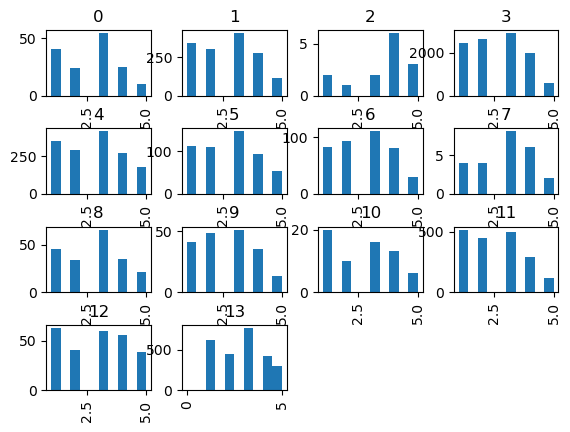

In [ ]:
df_raw.hist(column= "E1", by = "race")

This plot shows the distribution of one item of extraversion for all races. Some races seem to have a similar trend of increasing and then decreasing extraversion scores; however, it is hard to distinguish the difference. I will not be likely to use this plot to analyze the data.

<matplotlib.legend.Legend>

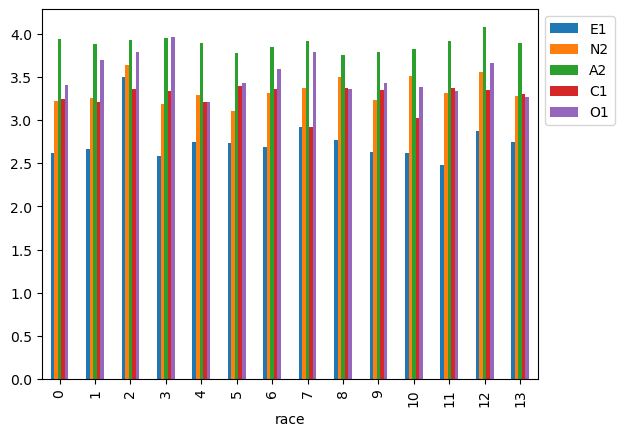

In [ ]:
df_raw_eda = df_raw[['race','E1','N2','A2','C1','O1']].copy()
bargraph_eda = df_raw_eda.groupby('race').mean().plot.bar()
plt.legend(bbox_to_anchor=(1.0,1.0))

This plot shows the mean average for one item of each personality trait, separated by race. All races seem to have the highest score on agreeableness and the lowest score on extraversion.

<seaborn.axisgrid.FacetGrid>

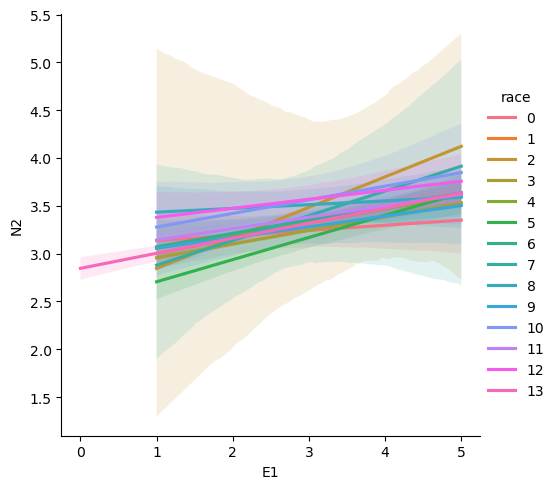

In [ ]:
sns.lmplot(df_raw, x='E1', y='N2', hue='race', scatter=False)

This plot shows the relationship between one item of neuroticism and extraversion for all races. Most races seem to have a weak positive relationship between neuroticism and extraversion.

<seaborn.axisgrid.FacetGrid>

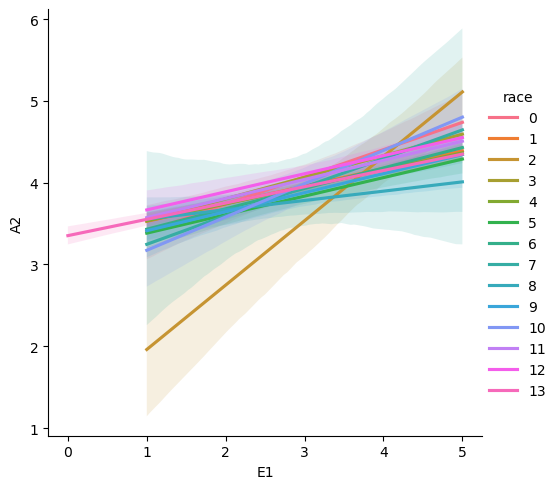

In [ ]:
sns.lmplot(df_raw, x='E1', y='A2', hue='race', scatter=False)

This plot shows the relationship between one item of agreeableness and extraversion for all races. Most races seem to have a weak positive relationship between agreeableness and extraversion.

<seaborn.axisgrid.FacetGrid>

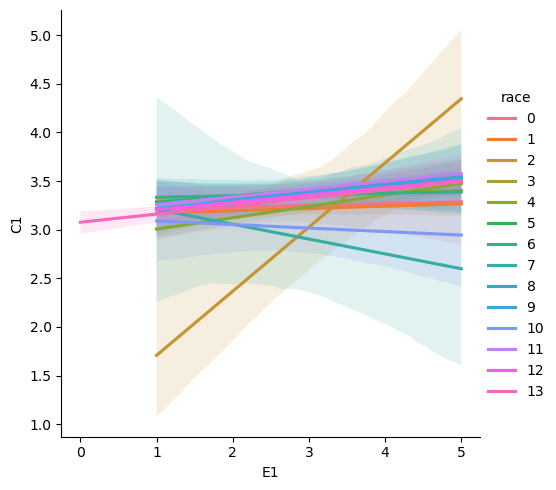

In [ ]:
sns.lmplot(df_raw, x='E1', y='C1', hue='race', scatter=False)

This plot shows the relationship between one item of conscientiousness and extraversion for all races. The relationship between conscientiousness and extraversion varies among races; it would be interesting to take a closer look at this relationship.

<seaborn.axisgrid.FacetGrid>

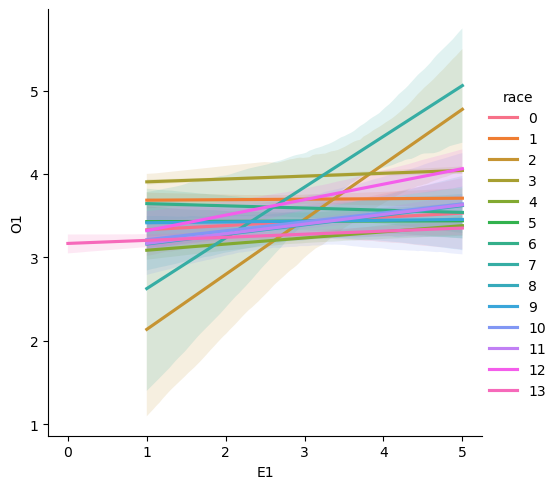

In [ ]:
sns.lmplot(df_raw, x='E1', y='O1', hue='race', scatter=False)

This plot shows the relationship between one item of openness and extraversion for all races. Most races seem to have no relationship between openness and extraversion.

<seaborn.axisgrid.FacetGrid>

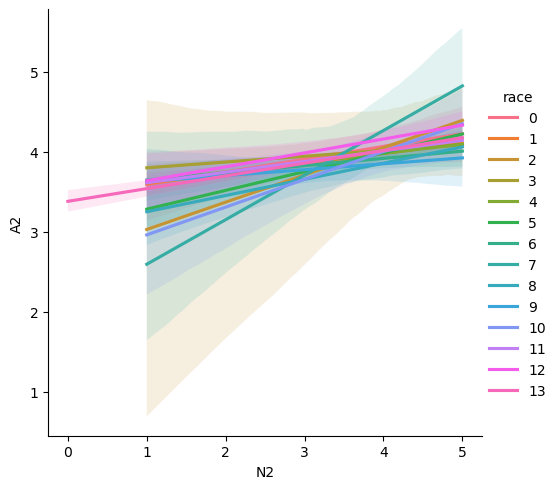

In [ ]:
sns.lmplot(df_raw, x='N2', y='A2', hue='race', scatter=False)

This plot shows the relationship between one item of agreeableness and neuroticism for all races. All races seem to have a weak positive relationship between agreeableness and neuroticism.

<seaborn.axisgrid.FacetGrid>

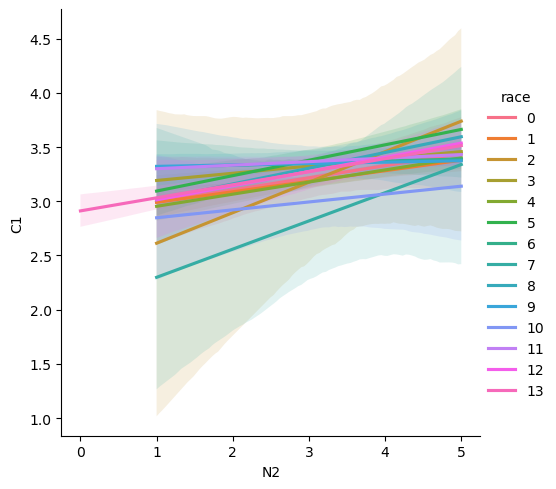

In [ ]:
sns.lmplot(df_raw, x='N2', y='C1', hue='race', scatter=False)

This plot shows the relationship between one item of conscientiousness and neuroticism for all races. All races seem to have a weak positive relationship between conscientiousness and neuroticism.

<seaborn.axisgrid.FacetGrid>

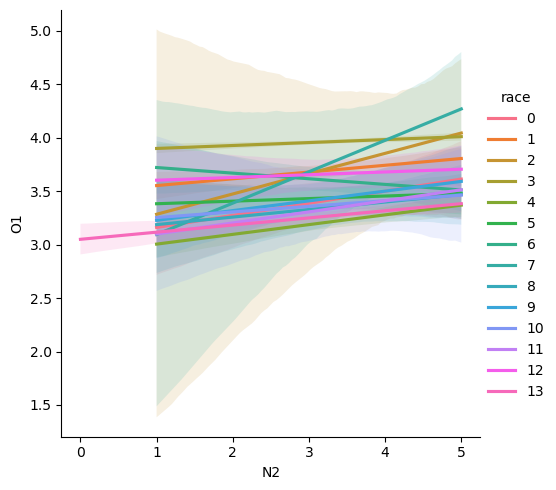

In [ ]:
sns.lmplot(df_raw, x='N2', y='O1', hue='race', scatter=False)

This plot shows the relationship between one item of openness and neuroticism for all races. Most races seem to have no relationship between openness and neuroticism.

<seaborn.axisgrid.FacetGrid>

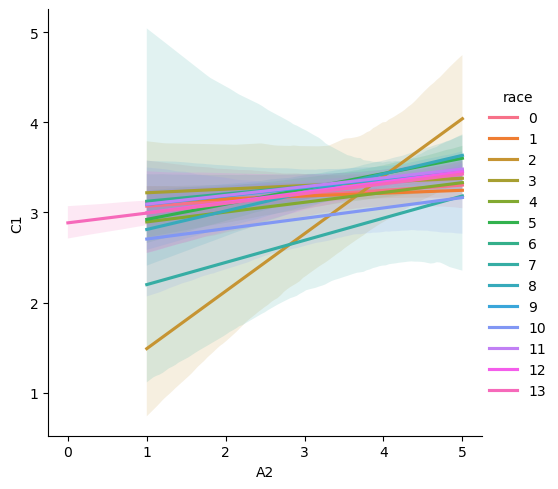

In [ ]:
sns.lmplot(df_raw, x='A2', y='C1', hue='race', scatter=False)

This plot shows the relationship between one item of conscientiousness and agreeableness for all races. Most races seem to have a weak positive relationship between conscientiousness and agreeableness.

<seaborn.axisgrid.FacetGrid>

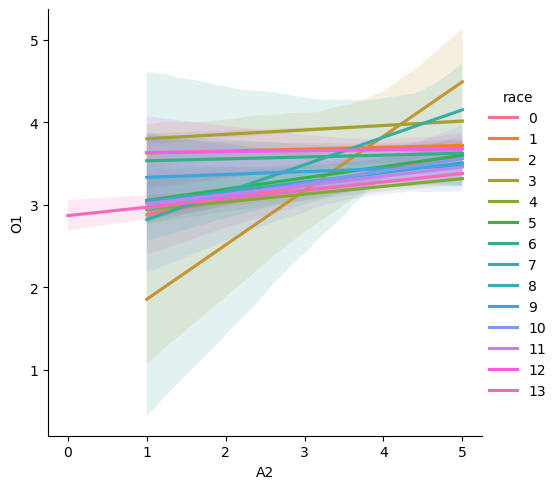

In [ ]:
sns.lmplot(df_raw, x='A2', y='O1', hue='race', scatter=False)

This plot shows the relationship between one item of openness and agreeableness for all races. Most races seem to have no relationship between openness and agreeableness.

<seaborn.axisgrid.FacetGrid>

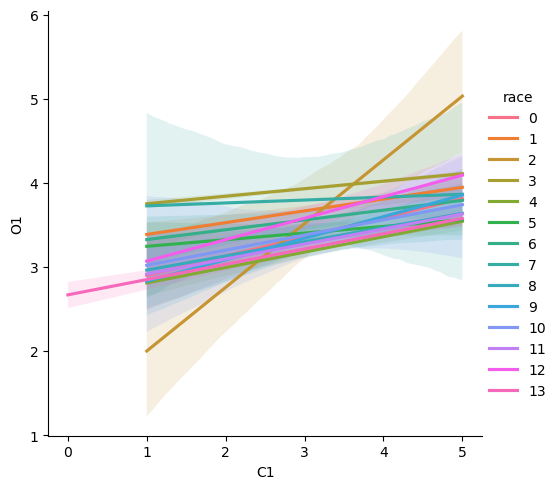

In [ ]:
sns.lmplot(df_raw, x='C1', y='O1', hue='race', scatter=False)

This plot shows the relationship between one item of openness and conscientiousness for all races. Most races seem to have a weak positive relationship between openness and conscientiousness.

I now have a good idea of the trends in the data relevant to my research question. There seems to be no significant relationship between personality traits and race.

## Task 2: Data Analysis Pipeline

#### 1. Load Data (already done)
#### 2. Clean Data

Remove columns that are not relevant to my research question: age, engnat, gender, hand, source, country.

In [ ]:
df_new = df_raw.copy().drop(['age', 'engnat', 'gender', 'hand', 'source', 'country'], axis=1)

Check for missing data: None and NaN values.

In [ ]:
pd.isnull(df_new).values.any()

False

In [ ]:
np.isnan(df_new).values.any()

False

There are neither None nor NaN values. Good!

#### 3. Process Data
According to the codebook, items were rated on a five-point scale where 1=Disagree, 3=Neutral, 5=Agree (0=missed). <br>
Reverse score certain items: E2, E4, E6, E8, E10, N1, N3, N5, N6, N7, N8, N9, N10, A1, A3, A5, A7, C2, C4, C6, C8, O2, O4, O6.

In [ ]:
#Reverse Scored Items: E2, E4, E6, E8, E10, N1, N3, N5, N6, N7, N8, N9, N10, A1, A3, A5, A7, C2, C4, C6, C8, O2, O4, O6

def reverseScoring(df, high, cols):
    '''
    Reverse scores on given column(s).
    
    Arguments:
    df - the data frame
    high - (int) the highest score available
    cols - the column(s) to reverse
    '''
    df[cols] = high - df[cols]
    return df

In [ ]:
df_new = reverseScoring(df_new, 6, cols=['E2','E4','E6','E8','E10','N1','N3','N5','N6','N7','N8','N9','N10','A1','A3','A5','A7','C2','C4','C6','C8','O2','O4','O6'])

Create factor total scores for big five personality traits: extroversion, neuroticism, agreeableness, conscientiousness, openness.

In [ ]:
df_new['E_Total'] = df_new.loc[:, 'E1':'E10'].sum(axis=1)
df_new['N_Total'] = df_new.loc[:, 'N1':'N10'].sum(axis=1)
df_new['A_Total'] = df_new.loc[:, 'A1':'A10'].sum(axis=1)
df_new['C_Total'] = df_new.loc[:, 'C1':'C10'].sum(axis=1)
df_new['O_Total'] = df_new.loc[:, 'O1':'O10'].sum(axis=1)

This data contains 14 race values. According to the codebook, each code refers to:

0 = Missing <br>
1 = Mixed Race <br>
2 = Arctic (Siberian, Eskimo) <br>
3 = Caucasian (European) <br>
4 = Caucasian (Indian) <br>
5 = Caucasian (Middle East) <br>
6 = Caucasian (North African, Other) <br>
7 = Indigenous Australian <br>
8 = Native American <br>
9 = North East Asian (Mongol, Tibetan, Korean, Japanese, etc.) <br>
10 = Pacific (Polynesian, Micronesian, etc.) <br>
11 = South East Asian (Chinese, Thai, Malay, Filipino, etc.) <br>
12 = West African, Bushmen <br>
13 = Other

Remove 0, 1 and 13 and categorize into 5 groups.

0. American Indian or Alaska Native: 2,8
1. Asian: 9,11
2. Black or African American: 7,12
3. Native Hawaiian or Other Pacific Islander: 10
4. White: 3,4,5,6

In [ ]:
df_new = df_new[df_new['race'] != 0]
df_new = df_new[df_new['race'] != 1]
df_new = df_new[df_new['race'] != 13]

In [ ]:
df_new = df_new.replace({'race':2},100)
df_new = df_new.replace({'race':8},100)
df_new = df_new.replace({'race':9},101)
df_new = df_new.replace({'race':11},101)
df_new = df_new.replace({'race':7},102)
df_new = df_new.replace({'race':12},102)
df_new = df_new.replace({'race':10},103)
df_new = df_new.replace({'race':3},104)
df_new = df_new.replace({'race':4},104)
df_new = df_new.replace({'race':5},104)
df_new = df_new.replace({'race':6},104)

In [ ]:
df_new = df_new.replace({'race':100},0)
df_new = df_new.replace({'race':101},1)
df_new = df_new.replace({'race':102},2)
df_new = df_new.replace({'race':103},3)
df_new = df_new.replace({'race':104},4)

In [ ]:
df_new

,race,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O6,O7,O8,O9,O10,E_Total,N_Total,A_Total,C_Total,O_Total
0,4,4,4,5,4,5,5,4,3,5,...,5,4,2,5,5,44,49,46,47,43
3,4,2,1,2,2,3,2,3,2,4,...,4,5,2,5,5,22,17,37,26,41
4,1,3,5,3,3,3,5,3,5,3,...,5,3,1,5,3,34,30,44,34,34
6,4,5,5,5,5,5,5,5,2,4,...,5,4,3,3,4,46,39,45,28,41
7,4,4,3,5,3,5,5,4,3,4,...,5,5,3,2,5,39,45,41,44,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1,1,2,3,1,4,3,1,4,1,...,5,4,2,5,3,21,19,42,36,35
19715,4,2,3,2,3,2,3,2,2,4,...,3,4,2,3,3,25,39,36,32,30
19716,4,2,1,4,1,5,1,1,4,1,...,5,1,5,5,5,21,10,26,23,37
19717,2,1,2,2,3,2,2,1,3,4,...,5,5,3,5,5,21,20,38,43,42


#### 4. Wrangle Data
Create a data frame that only contains relevant to my research question:
- Categorized race: American Indian or Alaska Native, Asian, Black or African American, Native Hawaiian or Other Pacific Islander, White.
- Factor total scores for the big five personality traits: Extroversion, Neuroticism, Agreeableness, Conscientiousness, Openness.

In [ ]:
df_cleaned = df_new[['race', 'E_Total', 'N_Total', 'A_Total', 'C_Total', 'O_Total']]

Rename columns for the big five personality traits and race.

In [ ]:
df_cleaned = df_cleaned.rename(columns={'E_Total':'Extraversion',
                                       'N_Total':'Neuroticism',
                                       'A_Total':'Agreeableness',
                                       'C_Total':'Conscientiousness',
                                       'O_Total':'Openness',
                                       'race':'Race'})

In [ ]:
df_cleaned = df_cleaned.replace({'Race':0}, 'American Indian or Alaska Native')
df_cleaned = df_cleaned.replace({'Race':1}, 'Asian')
df_cleaned = df_cleaned.replace({'Race':2}, 'Black or African American')
df_cleaned = df_cleaned.replace({'Race':3}, 'Native Hawaiian or Other Pacific Islander')
df_cleaned = df_cleaned.replace({'Race':4}, 'White')

In [ ]:
df_cleaned

,Race,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,White,44,49,46,47,43
3,White,22,17,37,26,41
4,Asian,34,30,44,34,34
6,White,46,39,45,28,41
7,White,39,45,41,44,42
...,...,...,...,...,...,...
19714,Asian,21,19,42,36,35
19715,White,25,39,36,32,30
19716,White,21,10,26,23,37
19717,Black or African American,21,20,38,43,42


## Task 3: Method Chaining and writing Python programs
Step 1: Build and test the method chain(s). <br>
Transfer the steps to load, clean, process, and wrangle the data in Task 2 into a .py file.
#### Load package(s) and function(s):

In [ ]:
import pandas as pd
import project_functions3 as pf3

#### Method Chain 1:
Method chain to load a .csv file and drop unwanted columns.

In [ ]:
df_1 = (pd.read_csv("../data/raw/data.csv", sep='\t')
        .copy().drop(['age', 'engnat', 'gender', 'hand', 'source', 'country'], axis=1))
df_1

,race,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,4,2,5,2,5,1,4,3,5,...,4,1,3,1,5,1,4,2,5,5
1,13,2,2,3,3,3,3,1,5,1,...,3,3,3,3,2,3,3,1,3,2
2,1,5,1,1,4,5,1,1,5,5,...,4,5,5,1,5,1,5,5,5,5
3,3,2,5,2,4,3,4,3,4,4,...,4,3,5,2,4,2,5,2,5,5
4,11,3,1,3,3,3,1,3,1,3,...,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,1,4,3,5,4,3,1,2,1,...,1,3,5,3,4,1,4,2,5,3
19715,3,2,3,2,3,2,3,2,4,4,...,1,2,3,2,3,3,4,2,3,3
19716,5,2,5,4,5,5,5,1,2,1,...,5,3,1,3,4,1,1,5,5,5
19717,12,1,4,2,3,2,4,1,3,4,...,3,2,5,3,4,1,5,3,5,5


#### Method Chain 2:
Method chain to reverse score items that are reverse-coded and assign new columns containing factor total scores by summing scores on the constituent items for each factor.

In [ ]:
def reverseScoring(df, high, cols):
    '''
    Reverse scores on given column(s).
    
    Arguments:
    df - the data frame
    high - (int) the highest score available
    cols - the column(s) to reverse
    '''
    df[cols] = high - df[cols]
    return df

df_1 = reverseScoring(df_1, 6, cols=['E2','E4','E6','E8','E10','N1','N3','N5','N6','N7','N8','N9','N10','A1','A3','A5','A7','C2','C4','C6','C8','O2','O4','O6'])

df_2 = (pd.DataFrame(df_1)
        .assign(E_Total=lambda x: df_1.loc[:, 'E1':'E10'].sum(axis=1))
        .assign(N_Total=lambda x: df_1.loc[:, 'N1':'N10'].sum(axis=1))
        .assign(A_Total=lambda x: df_1.loc[:, 'A1':'A10'].sum(axis=1))
        .assign(C_Total=lambda x: df_1.loc[:, 'C1':'C10'].sum(axis=1))
        .assign(O_Total=lambda x: df_1.loc[:, 'O1':'O10'].sum(axis=1)))

df_2

,race,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O6,O7,O8,O9,O10,E_Total,N_Total,A_Total,C_Total,O_Total
0,3,4,4,5,4,5,5,4,3,5,...,5,4,2,5,5,44,49,46,47,43
1,13,2,4,3,3,3,3,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,1,5,5,1,2,5,5,1,1,5,...,5,5,5,5,5,35,14,38,49,45
3,3,2,1,2,2,3,2,3,2,4,...,4,5,2,5,5,22,17,37,26,41
4,11,3,5,3,3,3,5,3,5,3,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,1,2,3,1,4,3,1,4,1,...,5,4,2,5,3,21,19,42,36,35
19715,3,2,3,2,3,2,3,2,2,4,...,3,4,2,3,3,25,39,36,32,30
19716,5,2,1,4,1,5,1,1,4,1,...,5,1,5,5,5,21,10,26,23,37
19717,12,1,2,2,3,2,2,1,3,4,...,5,5,3,5,5,21,20,38,43,42


Step 2: Wrap the method chain(s) in a function.

In [ ]:
import project_functions3 as pf3
df = pf3.load_and_process("../data/raw/data.csv")
df

,race,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O6,O7,O8,O9,O10,E_Total,N_Total,A_Total,C_Total,O_Total
0,3,4,4,5,4,5,5,4,3,5,...,5,4,2,5,5,44,49,46,47,43
1,13,2,4,3,3,3,3,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,1,5,5,1,2,5,5,1,1,5,...,5,5,5,5,5,35,14,38,49,45
3,3,2,1,2,2,3,2,3,2,4,...,4,5,2,5,5,22,17,37,26,41
4,11,3,5,3,3,3,5,3,5,3,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,1,2,3,1,4,3,1,4,1,...,5,4,2,5,3,21,19,42,36,35
19715,3,2,3,2,3,2,3,2,2,4,...,3,4,2,3,3,25,39,36,32,30
19716,5,2,1,4,1,5,1,1,4,1,...,5,1,5,5,5,21,10,26,23,37
19717,12,1,2,2,3,2,2,1,3,4,...,5,5,3,5,5,21,20,38,43,42


Nice and clean!
## Task 4: Analysis for the Research Question(s)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import project_functions3 as pf3
df = pf3.load_and_process("../data/raw/data.csv")
df

,race,E1,E2,E3,E4,E5,E6,E7,E8,E9,...,O6,O7,O8,O9,O10,E_Total,N_Total,A_Total,C_Total,O_Total
0,3,4,4,5,4,5,5,4,3,5,...,5,4,2,5,5,44,49,46,47,43
1,13,2,4,3,3,3,3,1,1,1,...,3,3,1,3,2,22,29,35,42,26
2,1,5,5,1,2,5,5,1,1,5,...,5,5,5,5,5,35,14,38,49,45
3,3,2,1,2,2,3,2,3,2,4,...,4,5,2,5,5,22,17,37,26,41
4,11,3,5,3,3,3,5,3,5,3,...,5,3,1,5,3,34,30,44,34,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,1,2,3,1,4,3,1,4,1,...,5,4,2,5,3,21,19,42,36,35
19715,3,2,3,2,3,2,3,2,2,4,...,3,4,2,3,3,25,39,36,32,30
19716,5,2,1,4,1,5,1,1,4,1,...,5,1,5,5,5,21,10,26,23,37
19717,12,1,2,2,3,2,2,1,3,4,...,5,5,3,5,5,21,20,38,43,42


In [ ]:
# I should have done this using method chaining; however, I could not find an effective way to do it.

df = df[df['race'] != 0]
df = df[df['race'] != 1]
df = df[df['race'] != 13]

df = df.replace({'race':2},'American Indian or Alaska Native')
df = df.replace({'race':8},'American Indian or Alaska Native')
df = df.replace({'race':9},'Asian')
df = df.replace({'race':11},'Asian')
df = df.replace({'race':7},'Black or African American')
df = df.replace({'race':12},'Black or African American')
df = df.replace({'race':10},'Native Hawaiian or Other Pacific Islander')
df = df.replace({'race':3},'White')
df = df.replace({'race':4},'White')
df = df.replace({'race':5},'White')
df = df.replace({'race':6},'White')

df_cleaned = df[['race', 'E_Total', 'N_Total', 'A_Total', 'C_Total', 'O_Total']]
df_cleaned = df_cleaned.rename(columns={'E_Total':'Extraversion',
                                       'N_Total':'Neuroticism',
                                       'A_Total':'Agreeableness',
                                       'C_Total':'Conscientiousness',
                                       'O_Total':'Openness',
                                       'race':'Race'})

df_cleaned

,Race,Extraversion,Neuroticism,Agreeableness,Conscientiousness,Openness
0,White,44,49,46,47,43
3,White,22,17,37,26,41
4,Asian,34,30,44,34,34
6,White,46,39,45,28,41
7,White,39,45,41,44,42
...,...,...,...,...,...,...
19714,Asian,21,19,42,36,35
19715,White,25,39,36,32,30
19716,White,21,10,26,23,37
19717,Black or African American,21,20,38,43,42


#### My research question asks: Is there a relationship between personality traits and race?

Text(0.5, 1.0, 'Mean Factor Score by Race')

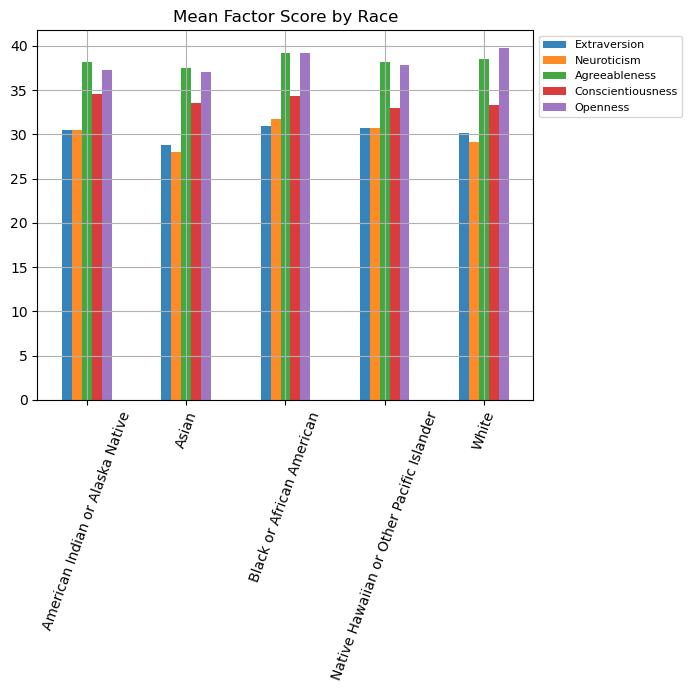

In [ ]:
mean_bargraph = df_cleaned.groupby('Race').mean().plot.bar(grid=True, width=.5, alpha=.90)
mean_bargraph.set(xlabel=None)
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize='8')
plt.title('Mean Factor Score by Race')

Text(0.5, 1.0, 'Median Factor Score by Race')

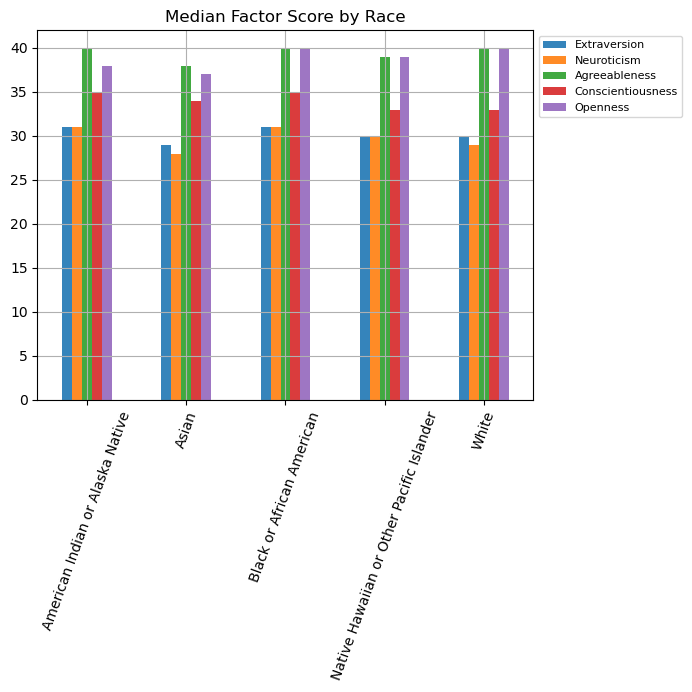

In [ ]:
median_bargraph = df_cleaned.groupby('Race').median().plot.bar(grid=True, width=.5, alpha=.90)
median_bargraph.set(xlabel=None)
plt.xticks(rotation=70)
plt.legend(bbox_to_anchor=(1.0,1.0), fontsize='8')
plt.title('Median Factor Score by Race')

In [ ]:
# I would like to display the two above plots in one figure. However, I was not able to find an efficient way to do it using the function plt.subplot().

### Figure 1
This bar plot shows the mean and median factor scores for each of the five personality traits, separated by race. All races show higher scores on agreeableness and openness and lower scores on extraversion and neuroticism. Scores on conscientiousness are in the middle for all races.

Text(0.5, 1.0, 'American Indian or Alaska Native')

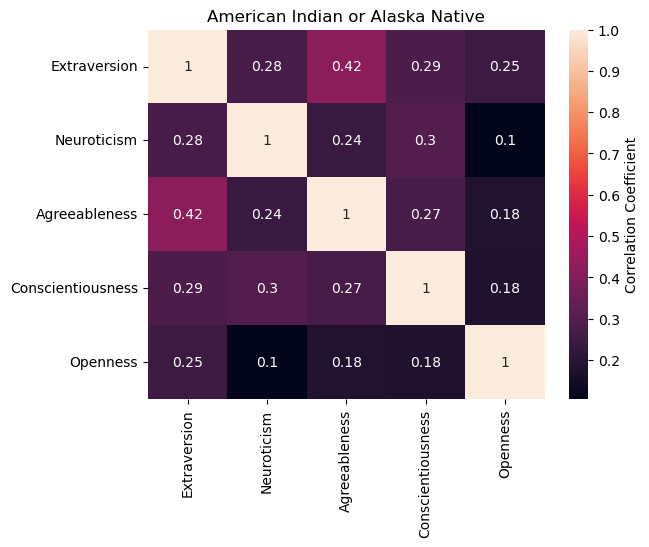

In [ ]:
df_cleaned_american = df_cleaned[df_cleaned['Race'] == 'American Indian or Alaska Native']
df_corr_american = df_cleaned_american.corr()
ax = plt.axes()
sns.heatmap(df_corr_american, ax=ax, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('American Indian or Alaska Native')

Text(0.5, 1.0, 'Asian')

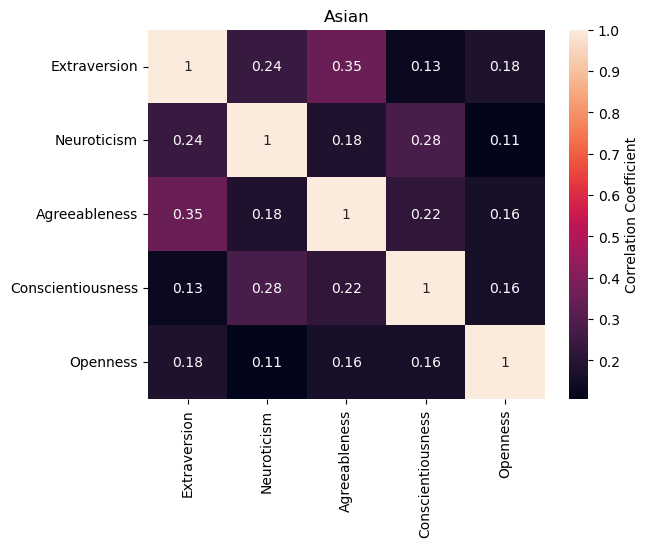

In [ ]:
df_cleaned_asian = df_cleaned[df_cleaned['Race'] == 'Asian']
df_corr_asian = df_cleaned_asian.corr()
ax = plt.axes()
sns.heatmap(df_corr_asian, ax=ax, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('Asian')

Text(0.5, 1.0, 'Black or African American')

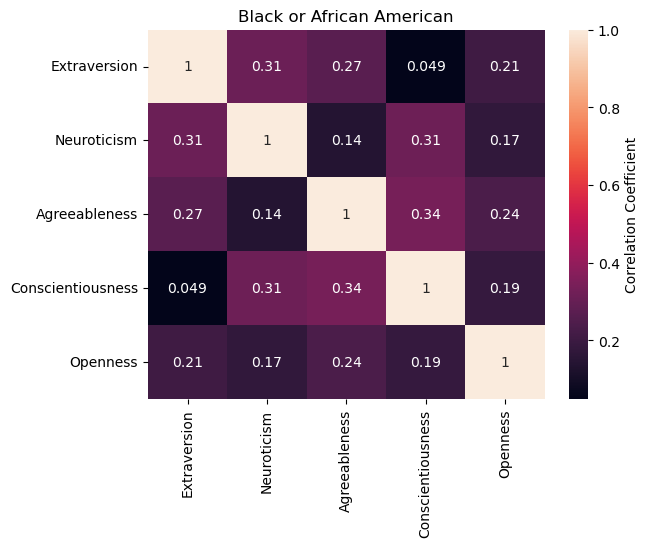

In [ ]:
df_cleaned_black = df_cleaned[df_cleaned['Race'] == 'Black or African American']
df_corr_black = df_cleaned_black.corr()
ax = plt.axes()
sns.heatmap(df_corr_black, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('Black or African American')

Text(0.5, 1.0, 'Native Hawaiian or Other Pacific Islander')

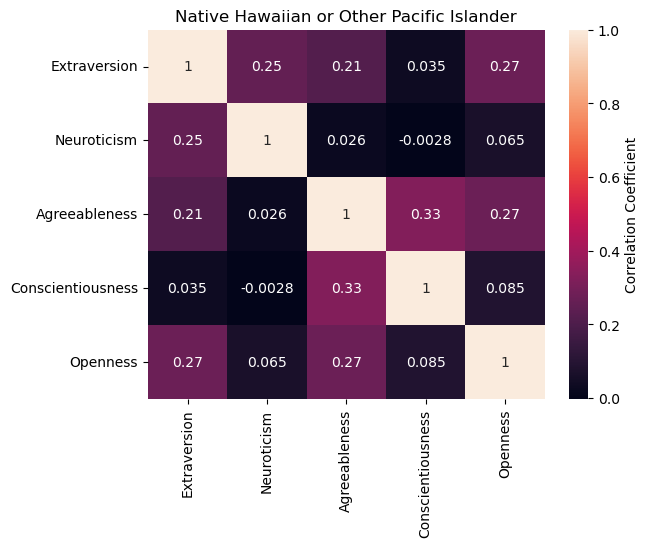

In [ ]:
df_cleaned_native = df_cleaned[df_cleaned['Race'] == 'Native Hawaiian or Other Pacific Islander']
df_corr_native = df_cleaned_native.corr()
ax = plt.axes()
sns.heatmap(df_corr_native, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('Native Hawaiian or Other Pacific Islander')

Text(0.5, 1.0, 'White')

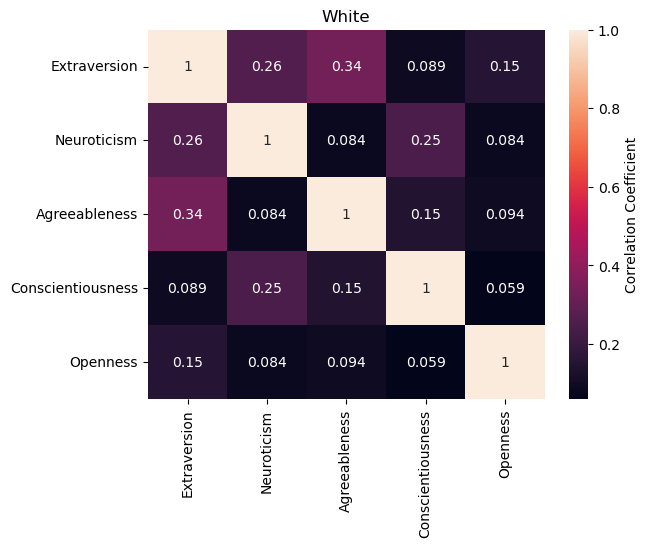

In [ ]:
df_cleaned_white = df_cleaned[df_cleaned['Race'] == 'White']
df_corr_white = df_cleaned_white.corr()
ax = plt.axes()
sns.heatmap(df_corr_white, annot=True, cbar_kws={'label':'Correlation Coefficient'})
ax.set_title('White')

In [ ]:
# I would like to display the five above plots in one figure. However, I was not able to find an efficient way to do it using the function plt.subplot().

### Figure 2
This plot shows Pearson's correlation coefficient among the five personality traits for each race. Lighter colours indicate a greater magnitude of the correlation. All races show a weak positive correlation or no correlation among the five personality traits.

The American Indian or Alaska Native shows the strongest correlation (r = .42) between Extraversion and Agreeableness and the weakest correlation (r = .10) between Neuroticism and Openness. Asian shows the strongest correlation (r = .35) between Extraversion and Agreeableness and the weakest correlation (r = .11) between Neuroticism and Openness. Black or African American shows the strongest correlation (r = .34) between Agreeableness and Conscientiousness and the weakest correlation (r = .049) between Extraversion and Conscientiousness. Native Hawaiian or Other Pacific Islander shows the strongest correlation (r = .33) between Agreeableness and Conscientiousness and the weakest correlation (r = .026) between Neuroticism and Agreeableness. White shows the strongest correlation (r = .34) between Extraversion and Agreeableness and the weakest correlation (r = .059) between Openness and Conscientiousness. No particular correlation between personality traits is strongest or weakest for all races.

However, all races show a stronger correlation between Extraversion and Agreeableness compared to other correlations between personality traits. Moreover, all races show a weaker correlation between Neuroticism and Openness and between Conscientiousness and Openness compared to other correlations between personality traits.

<matplotlib.legend.Legend>

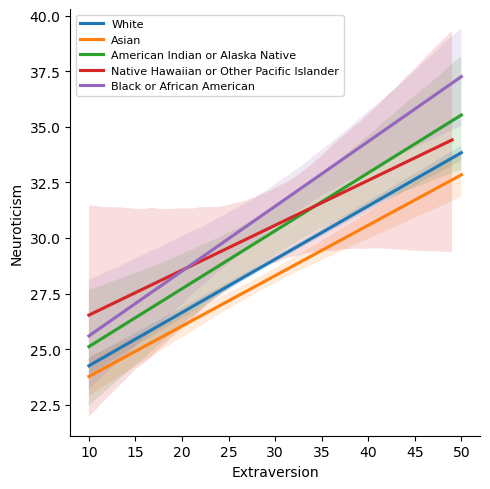

In [ ]:
sns.lmplot(df_cleaned, x='Extraversion', y='Neuroticism', hue='Race',  scatter=False, legend=False)
plt.legend(fontsize='8')

<matplotlib.legend.Legend>

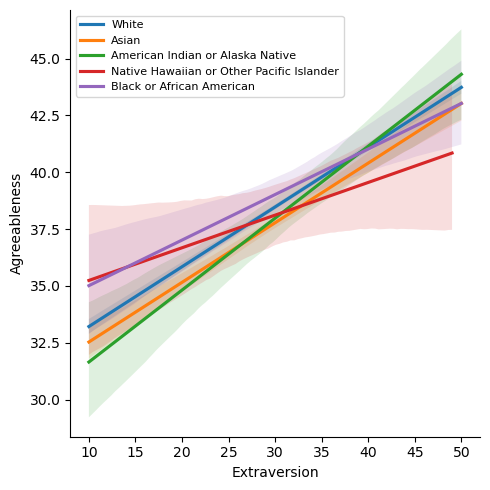

In [ ]:
sns.lmplot(df_cleaned, x='Extraversion', y='Agreeableness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

<matplotlib.legend.Legend>

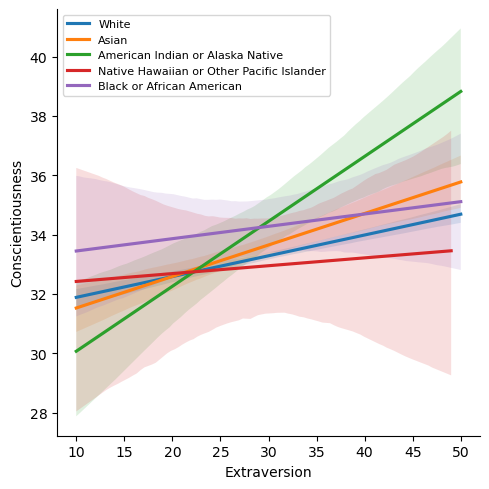

In [ ]:
sns.lmplot(df_cleaned, x='Extraversion', y='Conscientiousness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

<matplotlib.legend.Legend>

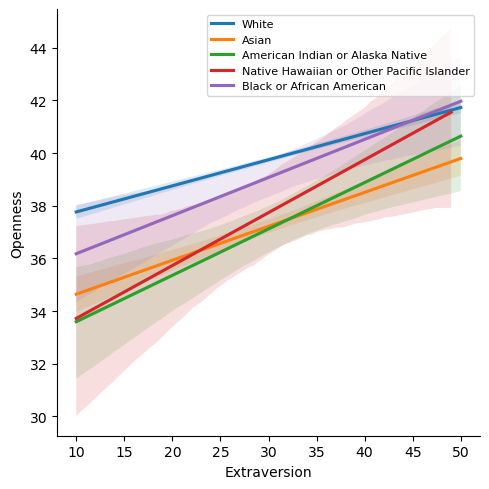

In [ ]:
sns.lmplot(df_cleaned, x='Extraversion', y='Openness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

<matplotlib.legend.Legend>

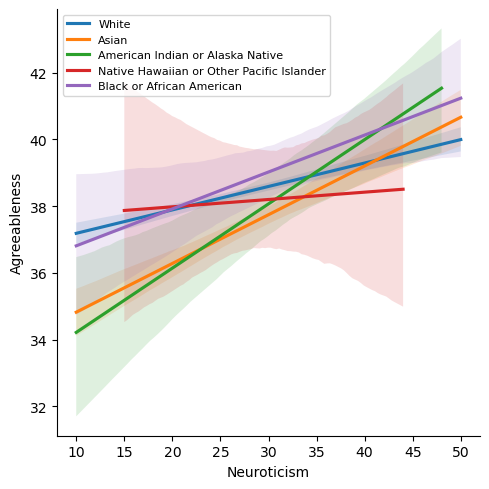

In [ ]:
sns.lmplot(df_cleaned, x='Neuroticism', y='Agreeableness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

<matplotlib.legend.Legend>

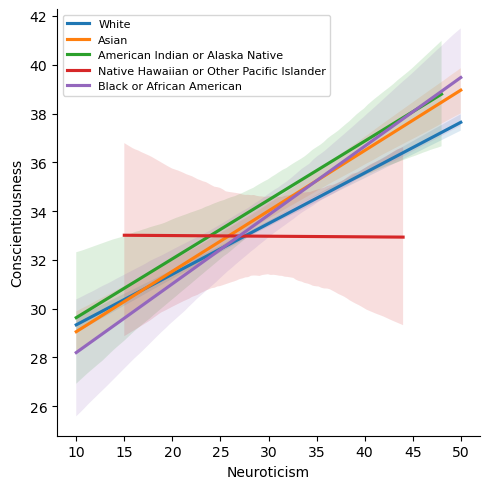

In [ ]:
sns.lmplot(df_cleaned, x='Neuroticism', y='Conscientiousness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

<matplotlib.legend.Legend>

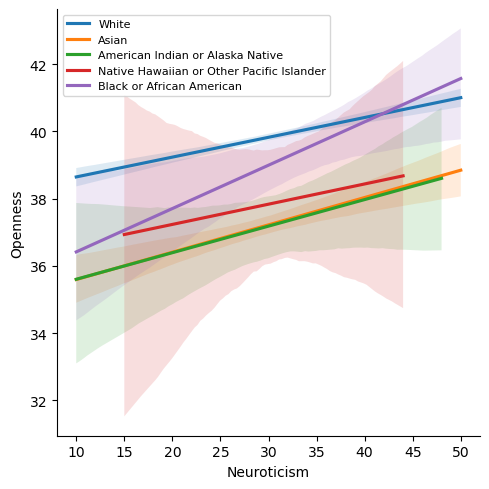

In [ ]:
sns.lmplot(df_cleaned, x='Neuroticism', y='Openness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

<matplotlib.legend.Legend>

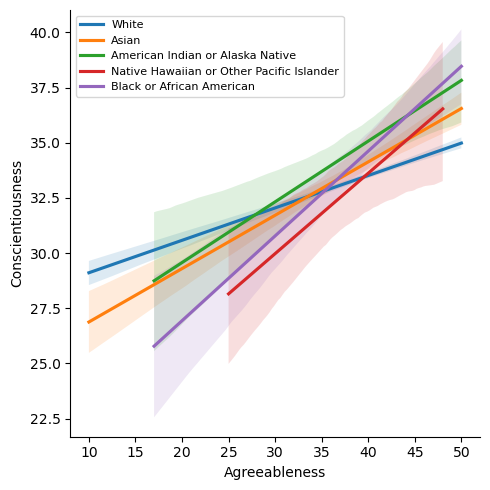

In [ ]:
sns.lmplot(df_cleaned, x='Agreeableness', y='Conscientiousness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

<matplotlib.legend.Legend>

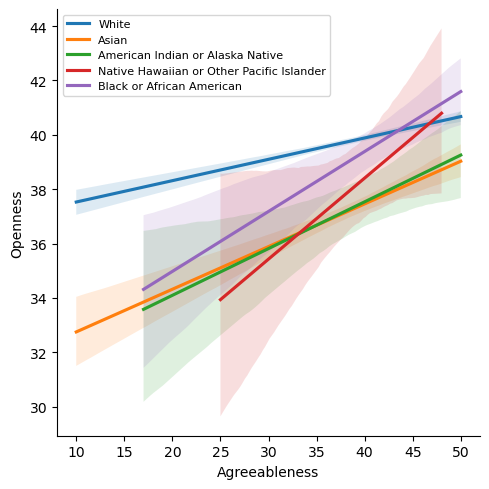

In [ ]:
sns.lmplot(df_cleaned, x='Agreeableness', y='Openness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

<matplotlib.legend.Legend>

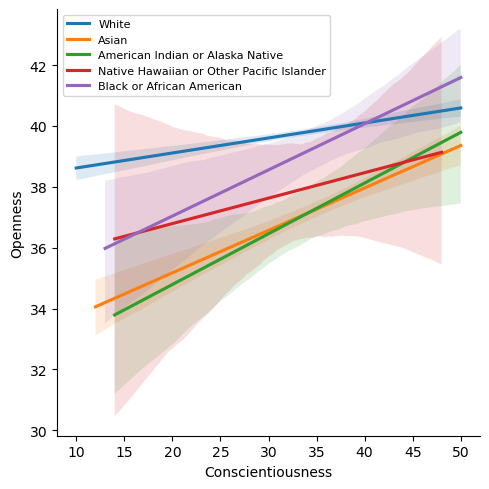

In [ ]:
sns.lmplot(df_cleaned, x='Conscientiousness', y='Openness', hue='Race', scatter=False, legend=False)
plt.legend(fontsize='8')

In [ ]:
# I would like to display the ten above plots in one figure. However, I was not able to find an efficient way to do it using the function plt.subplot().

### Figure 3
This line plot shows the relationship between the personality traits, separated by race.

All races show a positive relationship between Neuroticism and Extraversion, Agreeableness and Extraversion, Openness and Extraversion, Openness and Neuroticism, Conscientiousness and Agreeableness, Openness and Agreeableness, and Openness and Conscientiousness.

Native Hawaiian or Other Pacific Islander and Black or African American show no relationship between Conscientiousness and Extraversion. Other races show a positive relationship between Conscientiousness and Extraversion. Native Hawaiian or Other Pacific Islander shows no relationship between Agreeableness and Neuroticism. Other races show a positive relationship between Agreeableness and Neuroticism. Native Hawaiian or Other Pacific Islander shows no relationship between Conscientiousness and Neuroticism. Other races show a positive relationship between Conscientiousness and Neuroticism.

## Conclusion

I created three visualizations to examine the relationships between personality traits and race. I hypothesized that a particular race group would show higher scores on the big five personality traits (extraversion, neuroticism, agreeableness, conscientiousness, openness) than other race groups.

According to Figure 1, all races show higher scores on agreeableness and openness and lower scores on extraversion and neuroticism. Also, scores on conscientiousness are in the middle for all races. The result indicates no differences in the big five personality traits among races, which does not support the hypothesis.

According to Figure 2, there is no particular correlation between personality traits that are strongest or weakest for all races. However, all races show a stronger correlation between extraversion and agreeableness compared to other correlations between personality traits. Also, all races show a weaker correlation between neuroticism and openness and between conscientiousness and openness compared to other correlations between personality traits. The result indicates no differences in the big five personality traits among races, which does not support the hypothesis.

According to Figure 3, some races show no relationship between personality traits; however, most races tend to show a positive relationship between personality traits. The result indicates no differences in the big five personality traits among races, which does not support the hypothesis.

In conclusion, there is no significant relationship between personality traits and race.

In [ ]:
df_cleaned.to_csv("../data/proceSssed/Minju_Data_processed.csv", index = False)